# BANK CHURN PREDICTION

Analyzing and predicting customer churn are critical aspects of customer relationship management for many companies, especially in sectors such as banking and telecommunications. In this project, we have addressed the challenge of customer churn using data analysis and predictive modeling techniques.

**Exploratory Data Analysis (EDA)**

We begin by exploring and visualizing our dataset using Python and the pandas, numpy, matplotlib, and seaborn libraries. We perform a detailed analysis of customer characteristics such as age, gender, credit score, estimated salary, balance, and membership duration. We investigated the relationship between these characteristics and the customer churn rate.

**Customer segmentation**

We use clustering techniques, specifically the K-Means algorithm, to segment customers into groups with similar characteristics. We visualize the resulting clusters and perform a detailed analysis of the characteristics of each segment to understand what makes them different from each other.

**Analysis of the tendency to Abandon**

We examine churn propensity within each customer segment and perform a comparative analysis of the characteristics of segments with high churn propensity versus those with low churn propensity. This helped us identify patterns and factors that could be related to attrition.

**Predictive Modeling**

Finally, we build machine learning models, such as logistic regression, random forests, and gradient boosting, to predict the probability of a customer churning in the future. We evaluate the performance of each model using metrics such as precision, recall, and the confusion matrix.

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [267]:
data=pd.read_csv("/content/Churn_Modelling.csv")

In [268]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [269]:
data = data.drop(columns=['RowNumber'])

In [270]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


# ANALYSIS

***Churn rate over age***

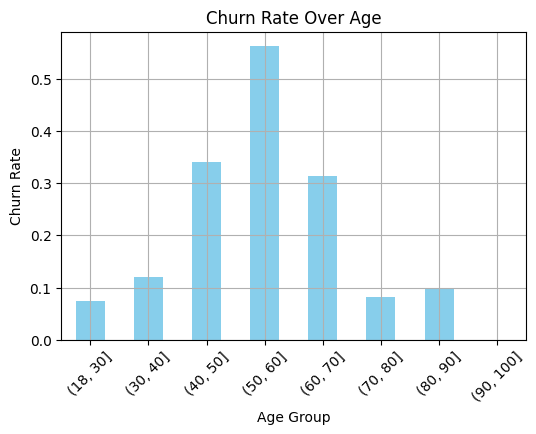

In [271]:
age_groups = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 70, 80, 90, 100])
churn_rate_age = data.groupby(age_groups)['Exited'].mean()

plt.figure(figsize=(6, 4))
churn_rate_age.plot(kind='bar', color='skyblue')
plt.title('Churn Rate Over Age')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

***Churn Rate Over Gender***

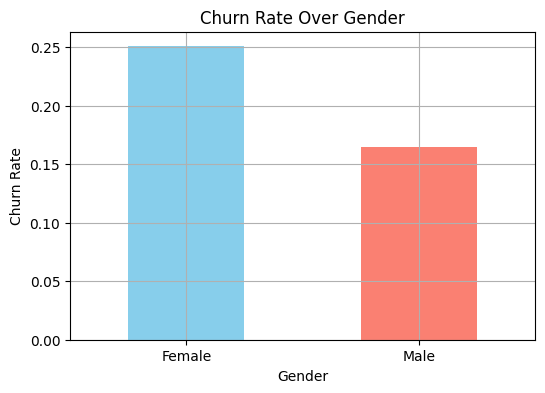

In [272]:
churn_rate_gender = data.groupby('Gender')['Exited'].mean()

plt.figure(figsize=(6, 4))
churn_rate_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Rate Over Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

***Churn rate over Salary***

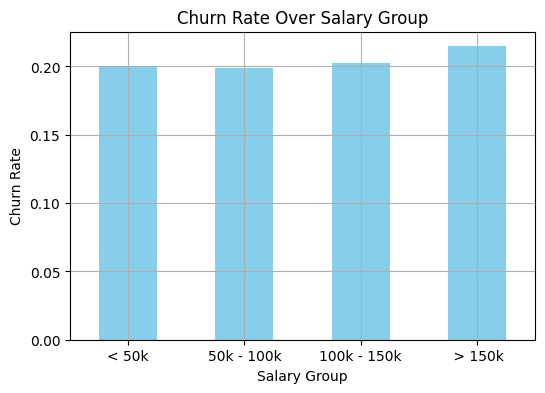

In [273]:
bins = [0,50000, 100000, 150000, float('inf')]
labels = ['< 50k', '50k - 100k', '100k - 150k', " > 150k"]
data['Salary_Group'] = pd.cut(data['EstimatedSalary'], bins=bins, labels=labels, right=False)

churn_rate_salary = data.groupby('Salary_Group')['Exited'].mean()

plt.figure(figsize=(6, 4))
churn_rate_salary.plot(kind='bar', color='skyblue')
plt.title('Churn Rate Over Salary Group')
plt.xlabel('Salary Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

***Churn Rate Over Credit Score***

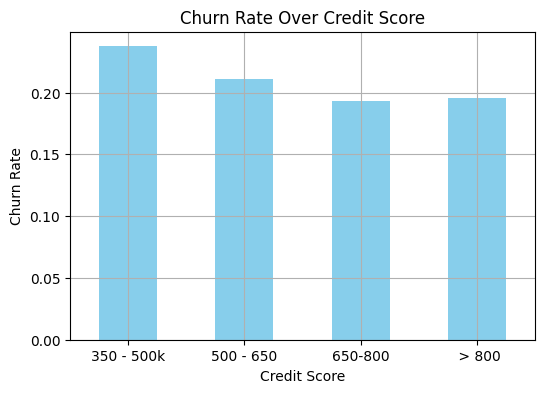

In [274]:
bins = [350,500,650,800,float('inf')]
labels = ['350 - 500k', '500 - 650',"650-800", " > 800"]
data['credit_score'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, right=False)

churn_rate_score = data.groupby('credit_score')['Exited'].mean()

plt.figure(figsize=(6, 4))
churn_rate_score.plot(kind='bar', color='skyblue')
plt.title('Churn Rate Over Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [275]:
# I need this data as numerical for the analysis
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

***Churn Rate Over Balance***

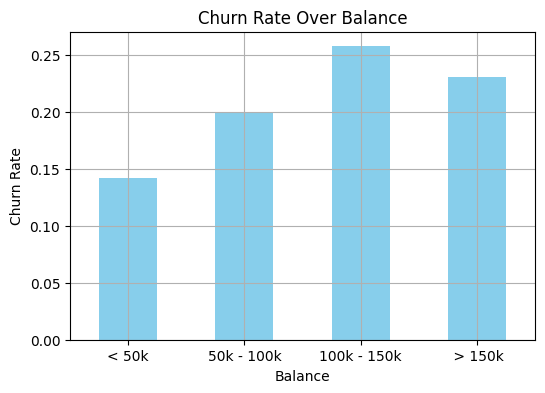

In [276]:
bins = [0,50000, 100000, 150000, float('inf')]
labels = ['< 50k', '50k - 100k', '100k - 150k', " > 150k"]
data['Total_balance'] = pd.cut(data['Balance'], bins=bins, labels=labels, right=False)

churn_rate_balance = data.groupby('Total_balance')['Exited'].mean()

plt.figure(figsize=(6, 4))
churn_rate_balance.plot(kind='bar', color='skyblue')
plt.title('Churn Rate Over Balance')
plt.xlabel('Balance')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

***Churn Rate over Tenure***

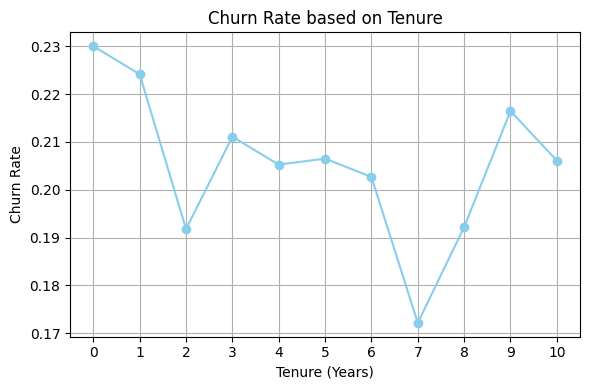

In [277]:
churn_rate_tenure = data.groupby('Tenure')['Exited'].mean()
plt.figure(figsize=(6, 4))
plt.plot(churn_rate_tenure.index, churn_rate_tenure.values, marker='o', color='skyblue', linestyle='-')
plt.title('Churn Rate based on Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate')
plt.xticks(churn_rate_tenure.index)
plt.grid(True)
plt.tight_layout()
plt.show()

# Client Segmentation

In [278]:
correlation_matrix = data.corr()
correlation_with_exited = correlation_matrix['Exited'].sort_values(ascending=False)
print(correlation_with_exited)

Exited             1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64


<ipython-input-278-83f7ab0e998b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [279]:
# K-Means
data = data.drop(['Surname',"Salary_Group", "Total_balance", "credit_score" ], axis=1)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

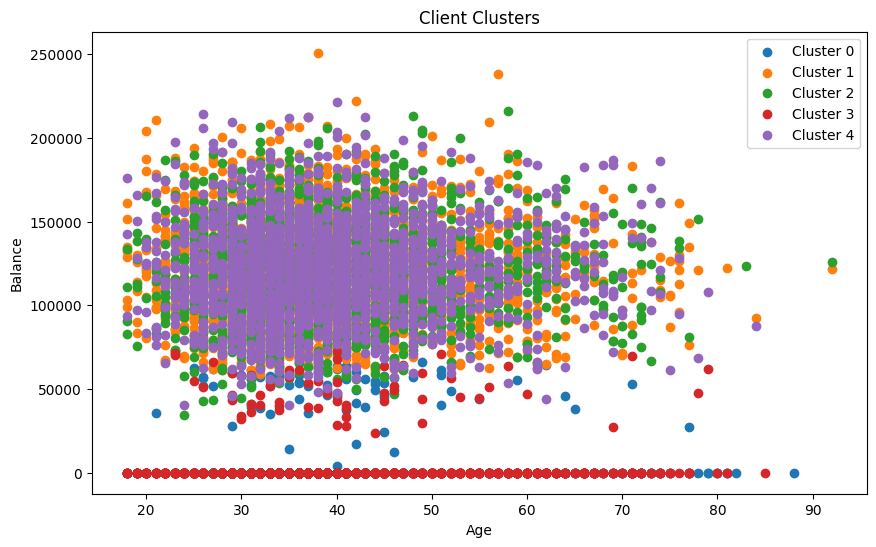

In [280]:
labels = kmeans.labels_
data['Cluster'] = labels

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Balance'], label=f'Cluster {i}')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Client Clusters')
plt.legend()
plt.show()

In [281]:
cluster_stats = data.groupby('Cluster').describe()
print(cluster_stats)

        CustomerId                                                       \
             count          mean           std         min          25%   
Cluster                                                                   
0           1923.0  1.575289e+07  36239.804557  15689781.0  15722102.50   
1           2558.0  1.576325e+07  31007.083439  15691875.0  15737742.75   
2           1798.0  1.563560e+07  41657.431793  15565701.0  15599472.75   
3           1828.0  1.562794e+07  35849.332347  15565706.0  15596928.25   
4           1893.0  1.564368e+07  43313.550912  15565779.0  15605926.00   

                                             CreditScore              ...  \
                50%          75%         max       count        mean  ...   
Cluster                                                               ...   
0        15752409.0  15783565.00  15815364.0      1923.0  649.456578  ...   
1        15764783.5  15789969.25  15815690.0      2558.0  652.416732  ...   
2        15633

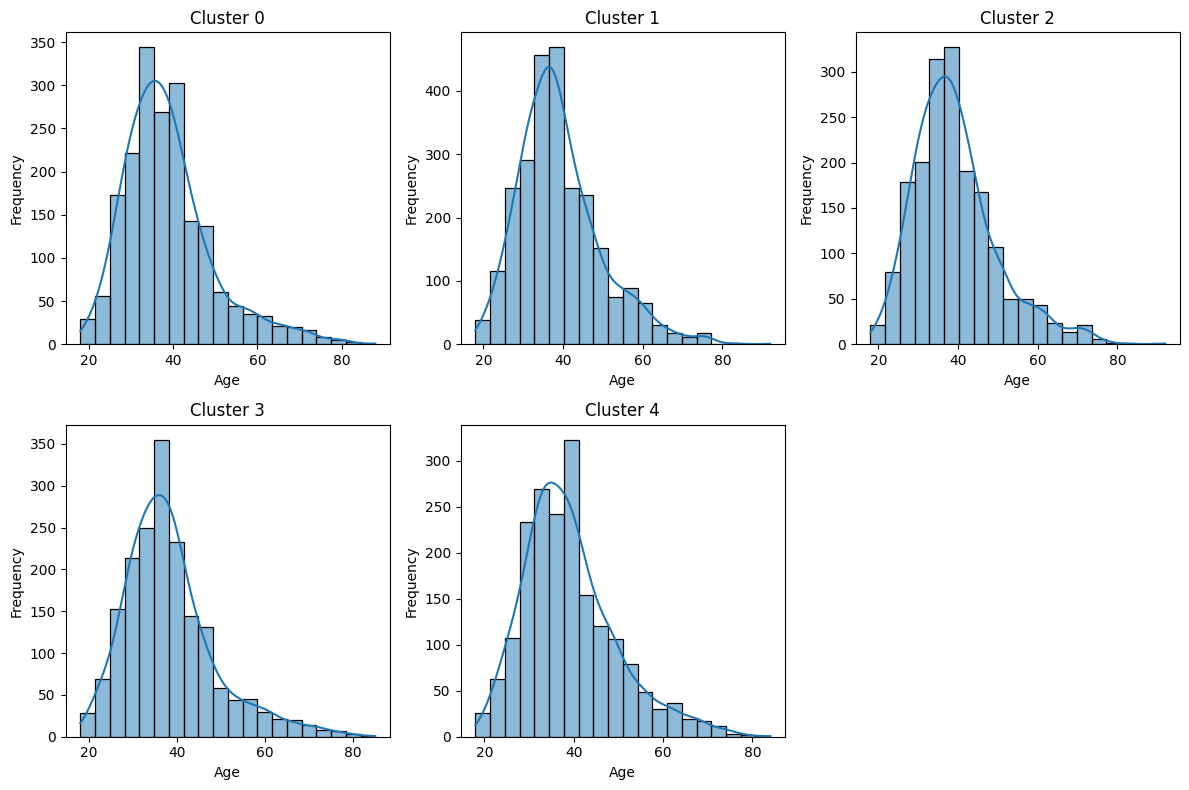

In [282]:
plt.figure(figsize=(12, 8))
for i in range(num_clusters):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[data['Cluster'] == i]['Age'], bins=20, kde=True)
    plt.title(f'Cluster {i}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [283]:
# Let´s find out how many clients really left the bank (Exited = 1)
churn_clients = data[data['Exited'] == 1]['Exited'].count()

total_clients = len(data)
churn_proportion = churn_clients / total_clients

print(f"Clients that has churn: {churn_clients}")
print(f"Total Clients: {total_clients}")
print(f"Churn Proportion: {churn_proportion:.2%}")

Clients that has churn: 2037
Total Clients: 10000
Churn Proportion: 20.37%


***CHURN RATE BY CLUSTER***

In [284]:
cluster_groups = data.groupby('Cluster')
churn_by_cluster = {}

for cluster, cluster_data in cluster_groups:
    total_clients_cluster = len(cluster_data)
    churn_clients_cluster = cluster_data['Exited'].sum()
    churn_rate_cluster = churn_clients_cluster / total_clients_cluster
    churn_by_cluster[cluster] = churn_rate_cluster

for cluster, churn_rate in churn_by_cluster.items():
    print(f"The Churn Rate for the cluster {cluster}: {churn_rate:.2%}")

The Churn Rate for the cluster 0: 14.51%
The Churn Rate for the cluster 1: 23.61%
The Churn Rate for the cluster 2: 23.75%
The Churn Rate for the cluster 3: 14.44%
The Churn Rate for the cluster 4: 24.46%


In [285]:
# Let´s compare features between the clusters
cluster_high_churn = max(churn_by_cluster, key=churn_by_cluster.get)
cluster_low_churn = min(churn_by_cluster, key=churn_by_cluster.get)

data_high_churn = cluster_groups.get_group(cluster_high_churn)
data_low_churn = cluster_groups.get_group(cluster_low_churn)

features_to_compare = ['Age', 'Balance', 'CreditScore', 'NumOfProducts', 'EstimatedSalary']

for features in features_to_compare:
    print(f"Mean '{features}' for clusters with high churn tendency: {data_high_churn[features].mean()}")
    print(f"Mean '{features}' for clusters with low churn tendency: {data_low_churn[features].mean()}")
    print()

Mean 'Age' for clusters with high churn tendency: 39.14474379292129
Mean 'Age' for clusters with low churn tendency: 38.312363238512035

Mean 'Balance' for clusters with high churn tendency: 121086.1836397253
Mean 'Balance' for clusters with low churn tendency: 1701.3612800875273

Mean 'CreditScore' for clusters with high churn tendency: 649.324352879028
Mean 'CreditScore' for clusters with low churn tendency: 649.9699124726477

Mean 'NumOfProducts' for clusters with high churn tendency: 1.4136291600633915
Mean 'NumOfProducts' for clusters with low churn tendency: 1.7647702407002188

Mean 'EstimatedSalary' for clusters with high churn tendency: 152981.4213365029
Mean 'EstimatedSalary' for clusters with low churn tendency: 98437.20941466083



In [286]:
data = data.drop(columns=['Cluster'])

# Building a Predictive Model

In [287]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Logictic Regression Model***

In [288]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [289]:
predictions = model.predict(X_test)

In [290]:
# Model Valuation
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

print("\nClasiffication Report:")
print(classification_report(y_test, predictions))

print("\nConfuxion Matrix:")
print(confusion_matrix(y_test, predictions))

Model Accuracy: 0.8035

Clasiffication Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


Confuxion Matrix:
[[1607    0]
 [ 393    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***RandomForest Model***

In [291]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

forest_predictions = forest_model.predict(X_test)

# Model valuation
forest_accuracy = accuracy_score(y_test, forest_predictions)
print("RandomForest Model Accuray:", forest_accuracy)

RandomForest Model Accuray: 0.8655


***Gradient Boosting Model***

In [292]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

gb_predictions = gradient_boosting_model.predict(X_test)

# Model Valuation
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Model Accuray:", gb_accuracy)

Gradient Boosting Model Accuray: 0.8655
